<a href="https://colab.research.google.com/github/ITSEENDA/AIO_Studies/blob/Image_Processing/BackgroundSubtraction_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

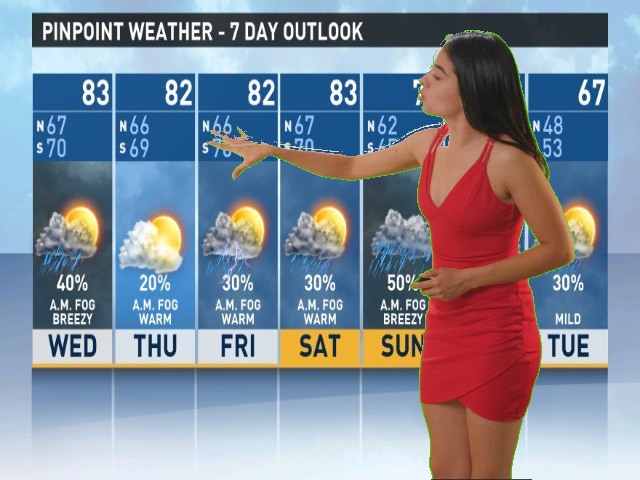

In [39]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

bg1_image = cv2.imread('background.png', 1)
bg1_image = cv2.resize(bg1_image, (640, 480))

ob_image = cv2.imread('StillImage.png', 1)
ob_image = cv2.resize(ob_image, (640, 480))

bg2_image = cv2.imread('FakeBackground.png')
bg2_image = cv2.resize(bg2_image, (640, 480))


output = replaceBackGround(bg1_image, bg2_image, ob_image)

cv2_imshow(output)



In [40]:
def grayscale(image):
  vector = np.array([0.072, 0.715, 0.213])
  result = image@vector
  return result

In [41]:
def computeDifference(bg_img, input_img):
  # your code here ****************
  A = np.absolute(grayscale(input_img) - grayscale(bg_img))
  difference_single_channel = A

  return difference_single_channel

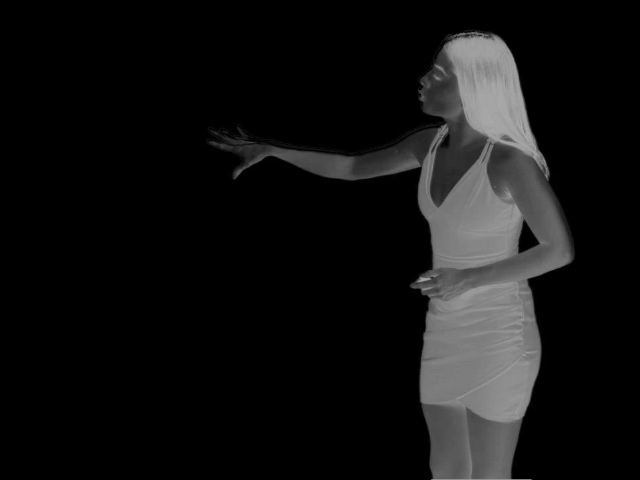

In [42]:
bg1_image = cv2.imread('background.png', 1)
bg1_image = cv2.resize(bg1_image, (640, 480))

ob_image = cv2.imread('StillImage.png', 1)
ob_image = cv2.resize(ob_image, (640, 480))

difference_single_channel = computeDifference(bg1_image,ob_image)
cv2_imshow(difference_single_channel)

In [43]:
def computeBinaryMask(difference_single_channel):
    # your code here ****************
  difference_binary = np.where(difference_single_channel < 15, 15, 255)
  difference_binary = np.expand_dims(difference_binary, axis=-1)
  return difference_binary

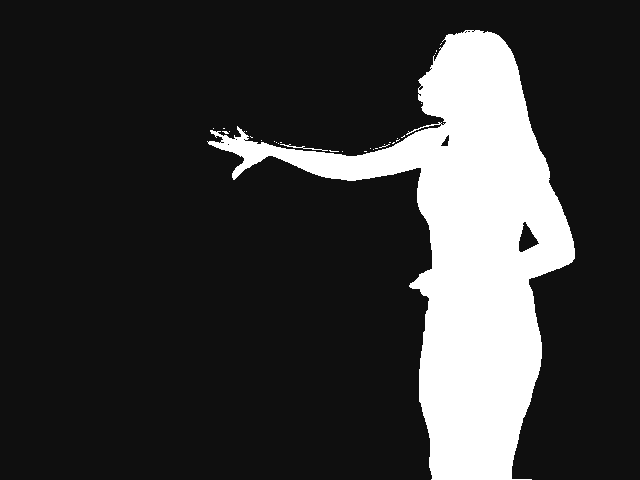

In [44]:

bg1_image = cv2.imread('background.png', 1)
bg1_image = cv2.resize(bg1_image, (640, 480))

ob_image = cv2.imread('StillImage.png', 1)
ob_image = cv2.resize(ob_image, (640, 480))

difference_single_channel = computeDifference(bg1_image,ob_image)

binary_mask = computeBinaryMask(difference_single_channel)
cv2_imshow(binary_mask)

In [45]:
def replaceBackGround(bg1_image, bg2_image, ob_image):
  difference_single_channel = computeDifference(bg1_image,ob_image)

  binary_mask = computeBinaryMask(difference_single_channel)

  output = np.where(binary_mask==255, ob_image, bg2_image)
  return output

